In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [7]:
dataset_path = r'D:\DataSets\seefood'
train_path = dataset_path + r'\train'
test_path = dataset_path + r'\test'
x_path = dataset_path + r'\x'
classes = ['hot_dog', 'not_hot_dog']

In [26]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
x = ImageDataGenerator(rescale = 1/255)

In [27]:
train_set = train.flow_from_directory(train_path, target_size = (256, 256))
test_set = train.flow_from_directory(train_path, target_size = (256, 256))
x_set = train.flow_from_directory(x_path, target_size = (256, 256))

Found 498 images belonging to 2 classes.
Found 498 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [11]:
train_set.class_indices
train_set.classes[200 : 350]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
x_train, y_train = next(train_set)

In [13]:
y_train[:5]
# one hot encoded values

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

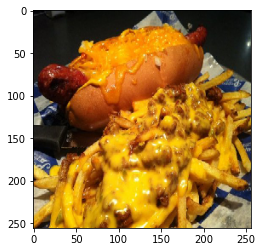

In [14]:
plt.imshow(x_train[1])
# outputs images from batch

In [18]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=16, kernel_size = (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=16, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=24, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

In [19]:
cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
cnn.fit(train_set, epochs = 12)

Epoch 1/12
16/16 [==============================] - 15s 415ms/step - loss: 0.6988 - accuracy: 0.5060
Epoch 2/12
16/16 [==============================] - 6s 343ms/step - loss: 0.6962 - accuracy: 0.4880
Epoch 3/12
16/16 [==============================] - 6s 363ms/step - loss: 0.6877 - accuracy: 0.5643
Epoch 4/12
16/16 [==============================] - 5s 333ms/step - loss: 0.6734 - accuracy: 0.6265
Epoch 5/12
16/16 [==============================] - 5s 334ms/step - loss: 0.6396 - accuracy: 0.6345
Epoch 6/12
16/16 [==============================] - 6s 337ms/step - loss: 0.5733 - accuracy: 0.7088
Epoch 7/12
16/16 [==============================] - 5s 323ms/step - loss: 0.5306 - accuracy: 0.7229
Epoch 8/12
16/16 [==============================] - 5s 318ms/step - loss: 0.4417 - accuracy: 0.8153
Epoch 9/12
16/16 [==============================] - 5s 336ms/step - loss: 0.3392 - accuracy: 0.8695
Epoch 10/12
16/16 [==============================] - 5s 274ms/step - loss: 0.2402 - accuracy: 0.907

In [21]:
cnn.evaluate(test_set)

16/16 [==============================] - 2s 126ms/step - loss: 0.0568 - accuracy: 0.9920


[0.05680164694786072, 0.9919678568840027]

In [28]:
cnn.evaluate(x_set)

2/2 [==============================] - 1s 807ms/step - loss: 1.7308 - accuracy: 0.5600


[1.7308380603790283, 0.5600000023841858]